Get the geometry from the Kaggle competetion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
detData = pd.read_csv("../trackingml/detectors.csv")

In [3]:
detData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18728 entries, 0 to 18727
Data columns (total 21 columns):
volume_id       18728 non-null int64
layer_id        18728 non-null int64
module_id       18728 non-null int64
cx              18728 non-null float64
cy              18728 non-null float64
cz              18728 non-null float64
rot_xu          18728 non-null float64
rot_xv          18728 non-null float64
rot_xw          18728 non-null float64
rot_yu          18728 non-null float64
rot_yv          18728 non-null float64
rot_yw          18728 non-null float64
rot_zu          18728 non-null int64
rot_zv          18728 non-null int64
rot_zw          18728 non-null int64
module_t        18728 non-null float64
module_minhu    18728 non-null float64
module_maxhu    18728 non-null float64
module_hv       18728 non-null int64
pitch_u         18728 non-null float64
pitch_v         18728 non-null float64
dtypes: float64(14), int64(7)
memory usage: 3.0 MB


Get the number of phi modules in the barrel

In [4]:
# Barrel IDs
barrelIDs = [(8,4,35),(13,4,0),(17,2,0)] # Format / (volumeID, nlayers) / cz of central module (for phi counting)

layerDataBarrel_oneModulePerRing = []

for bInfo in barrelIDs:
    volume_id = bInfo[0]
    for layItr in range(bInfo[1]):
        layer_id = 2*(layItr+1)
        layerDataBarrel_oneModulePerRing.append(
            detData[(detData["volume_id"] == volume_id) & (detData["layer_id"] == layer_id) & (detData["cz"] == bInfo[2])]
        )

nModulesInPhiBarrel = []
for ld in layerDataBarrel_oneModulePerRing:
    nModulesInPhiBarrel.append(len(ld))
nModulesInPhiBarrel

[16, 32, 52, 78, 40, 56, 78, 102, 120, 152]

Get the module data for the barrel

In [5]:
layerDataBarrel = []


for bInfo in barrelIDs:
    volume_id = bInfo[0]
    for layItr in range(bInfo[1]):
        layer_id = 2*(layItr+1)
        layerDataBarrel.append(
            detData[(detData["volume_id"] == volume_id) & (detData["layer_id"] == layer_id)]
        )


In [6]:
#detData[(detData["volume_id"] == 7) & (detData["rot_xu"] == 0.649448)] #0.078459
detData[(detData["volume_id"] == 7)]#["rot_xu"]
detData[(detData["volume_id"] == 7) & ((abs(detData["rot_xu"]- 0.078459)) < 0.001)]
#detData[(detData["rot_xu"] == 0.649448)]



volume_id  layer_id  module_id       cx      cy      cz    rot_xu  \
0            7         2          1 -65.7965 -5.1783 -1502.5  0.078459   
51           7         2         52  65.7965 -5.1783 -1497.5  0.078459   
108          7         4          1 -65.7965 -5.1783 -1302.5  0.078459   
159          7         4         52  65.7965 -5.1783 -1297.5  0.078459   
216          7         6          1 -65.7965 -5.1783 -1102.5  0.078459   
267          7         6         52  65.7965 -5.1783 -1097.5  0.078459   
324          7         8          1 -65.7965 -5.1783  -962.5  0.078459   
375          7         8         52  65.7965 -5.1783  -957.5  0.078459   
432          7        10          1 -65.7965 -5.1783  -822.5  0.078459   
483          7        10         52  65.7965 -5.1783  -817.5  0.078459   
540          7        12          1 -65.7965 -5.1783  -702.5  0.078459   
591          7        12         52  65.7965 -5.1783  -697.5  0.078459   
648          7        14          1 -65.7965 -5.1783  -602.5  0.078459   
699          7        14         52  65.7965 -5.1783  -597.5  0.078459   

       rot_xv  rot_xw    rot_yu   ...     rot_yw  rot_zu  rot_zv  rot_zw  \
0   -0.996917     0.0 -0.996917   ...        0.0       0       0      -1   
51   0.996917     0.0  0.996917   ...        0.0       0       0      -1   
108 -0.996917     0.0 -0.996917   ...        0.0       0       0      -1   
159  0.996917     0.0  0.996917   ...        0.0       0       0      -1   
216 -0.996917     0.0 -0.996917   ...        0.0       0       0      -1   
267  0.996917     0.0  0.996917   ...        0.0       0       0      -1   
324 -0.996917     0.0 -0.996917   ...        0.0       0       0      -1   
375  0.996917     0.0  0.996917   ...        0.0       0       0      -1   
432 -0.996917     0.0 -0.996917   ...        0.0       0       0      -1   
483  0.996917     0.0  0.996917   ...        0.0       0       0      -1   
540 -0.996917     0.0 -0.996917   ...        0.0       0       0      -1   
591  0.996917     0.0  0.996917   ...        0.0       0       0      -1   
648 -0.996917     0.0 -0.996917   ...        0.0       0       0      -1   
699  0.996917     0.0  0.996917   ...        0.0       0       0      -1   

     module_t  module_minhu  module_maxhu  module_hv  pitch_u  pitch_v  
0        0.15           8.4           8.4         36     0.05  0.05625  
51       0.15           8.4           8.4         36     0.05  0.05625  
108      0.15           8.4           8.4         36     0.05  0.05625  
159      0.15           8.4           8.4         36     0.05  0.05625  
216      0.15           8.4           8.4         36     0.05  0.05625  
267      0.15           8.4           8.4         36     0.05  0.05625  
324      0.15           8.4           8.4         36     0.05  0.05625  
375      0.15           8.4           8.4         36     0.05  0.05625  
432      0.15           8.4           8.4         36     0.05  0.05625  
483      0.15           8.4           8.4         36     0.05  0.05625  
540      0.15           8.4           8.4         36     0.05  0.05625  
591      0.15           8.4           8.4         36     0.05  0.05625  
648      0.15           8.4           8.4         36     0.05  0.05625  
699      0.15           8.4           8.4         36     0.05  0.05625  

[14 rows x 21 columns]

In [7]:
from module import module

In [8]:
detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 2) & (detData["module_id"] == 1)]

volume_id  layer_id  module_id       cx       cy     cz    rot_xu  \
756          8         2          1 -31.6303 -6.29166 -455.0  0.330043   

     rot_xv    rot_xw    rot_yu   ...       rot_yw  rot_zu  rot_zv  rot_zw  \
756     0.0 -0.943966 -0.943966   ...    -0.330043       0       1       0   

     module_t  module_minhu  module_maxhu  module_hv  pitch_u  pitch_v  
756      0.15           8.4           8.4         36     0.05  0.05625  

[1 rows x 21 columns]

In [9]:
detData[(detData["volume_id"] == 7) & (detData["layer_id"] == 2) & (detData["module_id"] == 1)]

volume_id  layer_id  module_id       cx      cy      cz    rot_xu  \
0          7         2          1 -65.7965 -5.1783 -1502.5  0.078459   

     rot_xv  rot_xw    rot_yu   ...     rot_yw  rot_zu  rot_zv  rot_zw  \
0 -0.996917     0.0 -0.996917   ...        0.0       0       0      -1   

   module_t  module_minhu  module_maxhu  module_hv  pitch_u  pitch_v  
0      0.15           8.4           8.4         36     0.05  0.05625  

[1 rows x 21 columns]

In [10]:
endcapModWheel2 = detData[(detData["volume_id"] == 16) & (detData["layer_id"] == 2)]

endcapTestMods = []
print(len(endcapModWheel2))
for modItr in range(len(endcapModWheel2)):
    endcapTestMods.append(module())
    endcapTestMods[-1].initFromFile(endcapModWheel2.iloc[modItr])

98


In [11]:
#testMod = module(0)
#endcapMod = detData[(detData["volume_id"] == 7) & (detData["layer_id"] == 2) & (detData["module_id"] == 1)]
#endcapMod.iloc[0]
#testMod.initFromFile(endcapMod.iloc[0])

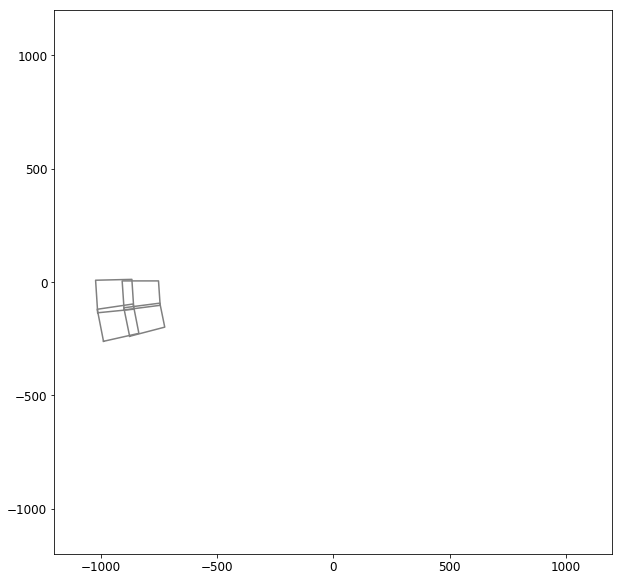

In [12]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1200
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

for modItr in range(4):
    endcapTestMods[modItr].drawEndcapModuleXY()
#detGeo.disk[0].drawDiskXY()
#print(testMod.corners_l)
#print(testMod.corners_l[1])

#plt.plot(testMod.corners_g[:,0],testMod.corners_g[:,1])

In [13]:
# Endcap IDs
# Format / (volumeID, ndisks, nLayersR) / cz of central module (for phi counting)
endcapIDs = [(7,7,2),(9,7,2),
             (12,6,3),(14,6,3),
             (16,6,2),(18,6,2),
            ]
layerDataEndcap = []
nModulesInREndcap = []
for eInfo in endcapIDs:
    volume_id = eInfo[0]
    for diskItr in range(eInfo[1]):
        disk_id = 2*(diskItr+1)
        layerDataEndcap.append(
            detData[(detData["volume_id"] == volume_id) & (detData["layer_id"] == disk_id)]
        )
        nModulesInREndcap.append(eInfo[2])

In [14]:
#detGeo = detector2D(layerData)

from detectorGeo import detectorGeo
detGeo = detectorGeo()
detGeo.initFromFile(layerDataBarrel,nModulesInPhiBarrel,layerDataEndcap,nModulesInREndcap)

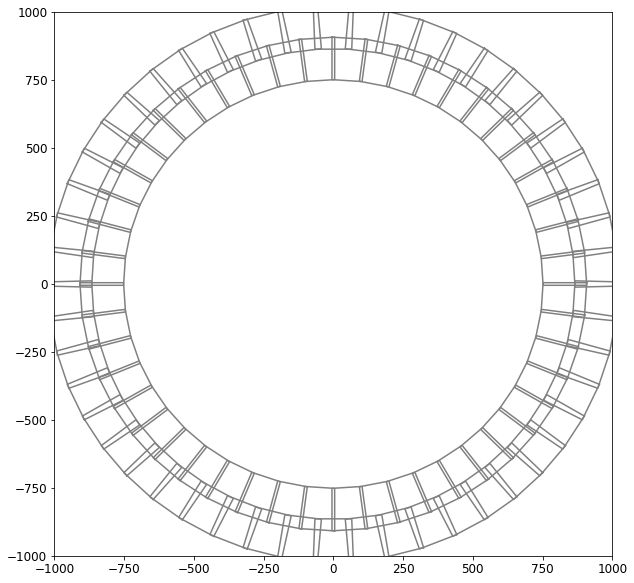

In [15]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1000
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.disks[26].drawDiskXY()
#print(testMod.corners_l)
#print(testMod.corners_l[1])

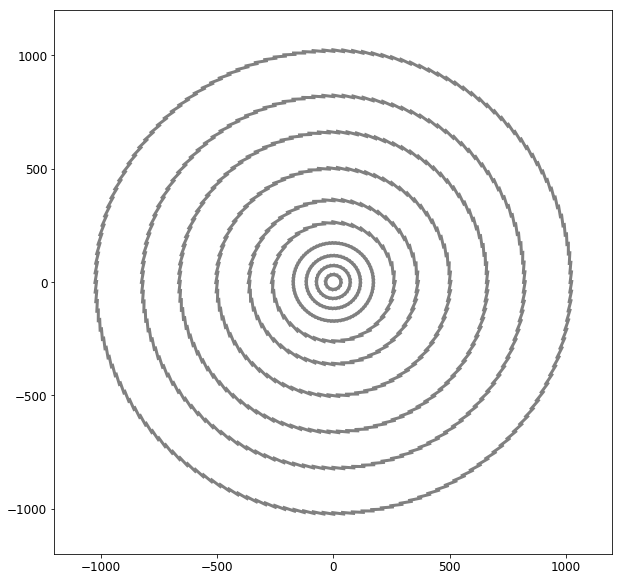

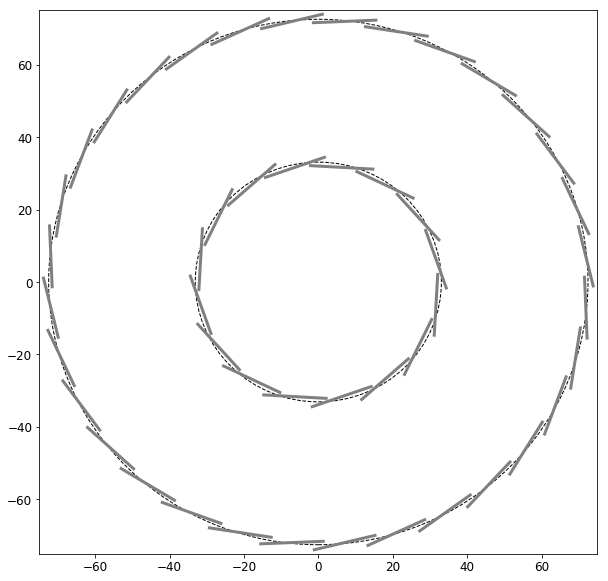

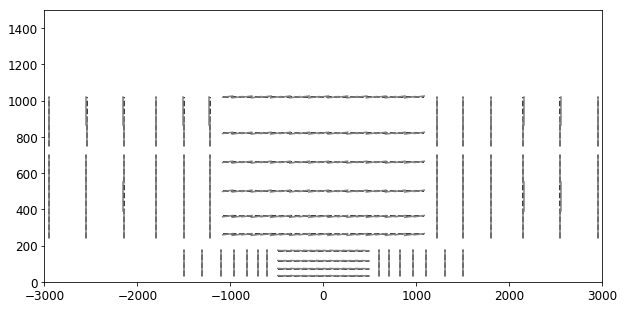

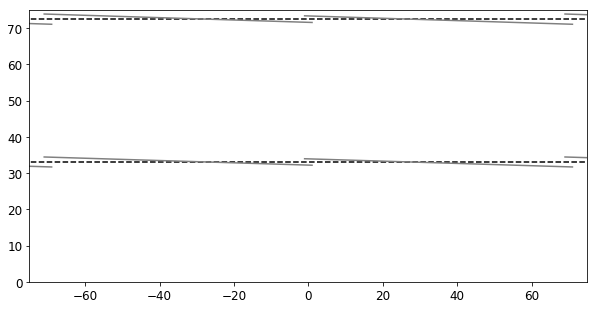

In [16]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1200
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
    
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 75
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)


fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 3000
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom/2))

detGeo.drawDetectorZR(ax,True)


fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 75
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom))

detGeo.drawDetectorZR(ax,True)

/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:138: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:139: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))


[((8.0, 2.0, 105.0), 32.592533809074176, 3.5395458820925967, -42.70360093929648), ((8.0, 4.0, 241.0), 71.42911356679392, 6.931348966708924, 10.948400310206239), ((8.0, 6.0, 443.0), 115.4936704320203, 9.698550861716285, 71.69576439900021), ((8.0, 8.0, 742.0), 170.76591669045672, 11.552482096065773, 147.74921642372968), ((13.0, 2.0, 541.0), 257.0286259333302, 10.860709570786184, 266.25809951413345), ((13.0, 4.0, 812.0), 365.9485207089608, 3.729883811284026, 415.88395306762135), ((13.0, 4.0, 813.0), 359.432129372423, 4.3540447049817885, 406.92504426690977), ((13.0, 6.0, 1287.0), 502.066317096718, -15.140020756214653, 603.5219899540973), ((13.0, 8.0, 1886.0), 660.9923938261032, -51.67540150272225, 824.7268355322922), ((17.0, 2.0, 2458.0), 815.6307429626333, -103.2109579000221, 1043.7446576092261), ((18.0, 2.0, 47.0), 939.0238846218905, -156.69754065675573, 1222.5)]
[(8.0, 2.0, 105.0), (8.0, 4.0, 241.0), (8.0, 6.0, 443.0), (8.0, 8.0, 742.0), (13.0, 2.0, 541.0), (13.0, 4.0, 812.0), (13.0, 4.

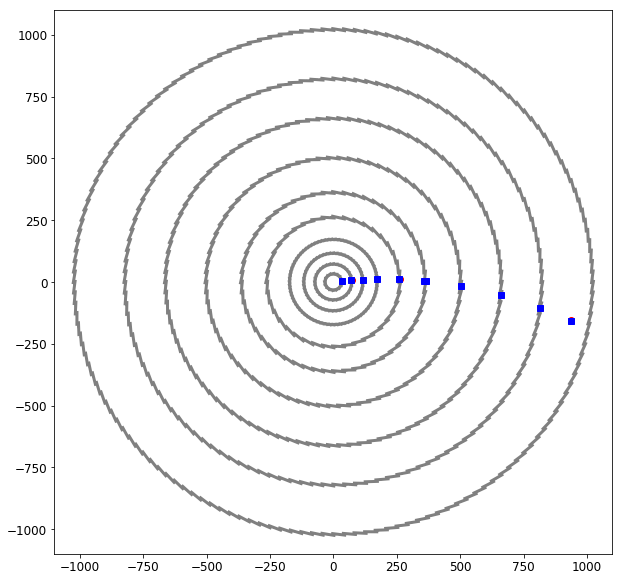

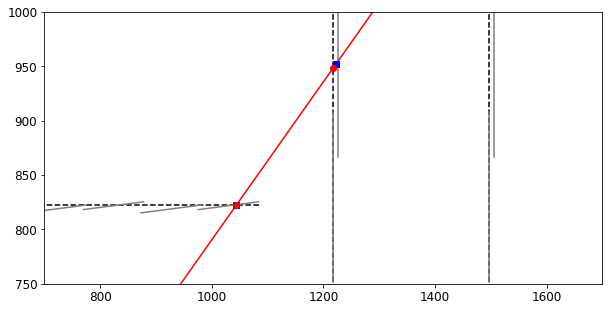

In [17]:
from TrackHelper import drawTrackZR

#print(trkI,pt,phi,theta,z0,q,6)
#1 1703.8045980297436 0.11779721249126889 2.874220615373779 -87.82713655854397 1 6



rc = 1703.8
phi = 0.117797
w = 1
theta = 80*np.pi/400
z0 = -87.8271365
#ps_hitXs, ps_hitYs, ps_hitZs, ps_hitRs, modulesHit, hits = detGeo.getHits3D(pt,phi,theta,z0,q)


xs, ys, zs, rs, modulesHit, actualHits = detGeo.getHits3D(rc,phi,theta,z0,1)

print(actualHits)
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
#detGeo.drawDetectorModules(modulesHit,False)

plt.plot(xs,ys,"ro")
actualHits=np.array(actualHits)
plt.plot(actualHits[:,1],actualHits[:,2],"bs")


fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 500
center = (1200,750)
ax.set_xlim((center[0]-zoom, center[0]+zoom))
ax.set_ylim((center[1]+0, center[1]+zoom/2))

detGeo.drawDetectorZR(ax,True)
#detGeo.drawDetectorModulesZR(modulesHit,False)
print(modulesHit)
xs = np.array(xs)
ys = np.array(ys)


drawTrackZR(theta,z0,1,3000)
plt.plot(actualHits[:,3],np.sqrt((actualHits[:,1]**2+actualHits[:,2]**2).astype(np.float64)),"bs")
plt.plot(zs,np.sqrt(xs**2+ys**2),"ro")


In [18]:
testMod = detGeo.disks[42-len(detGeo.layers)].mods[6]
print(testMod.rs)
print(testMod.rs[0:3:2])
print(testMod.rs)
print(testMod.corners_g[:,2])
print(testMod.corners_g[0:3:2,2])
print(testMod.corners_g)
x = np.array([0,1,2,3,4])
print(x[0:3:2])
print(x[0],x[2])

[1022.53787737  866.51705083  866.51707812 1022.5379026  1022.53787737]
[1022.53787737  866.51707812]
[1022.53787737  866.51705083  866.51707812 1022.5379026  1022.53787737]
[1222.5 1222.5 1222.5 1222.5 1222.5]
[1222.5 1222.5]
[[-953.579594 -369.147218 1222.5     ]
 [-809.871908 -308.154656 1222.5     ]
 [-753.66908  -427.59182  1222.5     ]
 [-892.267418 -499.442306 1222.5     ]
 [-953.579594 -369.147218 1222.5     ]]
[0 2]
0 2


In [19]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1000
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.disks[32].drawDiskXY()
modList = [(32, 81, 18.0, 2.0, 82.0)]
print(modulesHit)
print(detGeo.getLayerOrDisk(modulesHit[10]))
detGeo.drawDiskModulesXY([modulesHit[10]])
plt.plot(xs[-1],ys[-1],"ro")
#print(testMod.corners_l)
#print(testMod.corners_l[1])

[(8.0, 2.0, 105.0), (8.0, 4.0, 241.0), (8.0, 6.0, 443.0), (8.0, 8.0, 742.0), (13.0, 2.0, 541.0), (13.0, 4.0, 812.0), (13.0, 4.0, 813.0), (13.0, 6.0, 1287.0), (13.0, 8.0, 1886.0), (17.0, 2.0, 2458.0), (18.0, 2.0, 47.0)]


# OK, now lets try to plot the hits of a bunch of tracks

In [20]:
np.random.seed(3)

# Kaggle formats
eventParticles = []
eventTruth = []
eventHits = []

# For plotting 
solutions = []

nTrk = 50*3
hitID = 0

for trkI in range(nTrk):
    ptInv = np.random.uniform(0.01*0.001,1.33*0.001,1)[0]
    phi   = np.random.uniform(0.0,2*np.pi,1)[0]
    q     = 2*np.random.randint(0,2,1)[0]-1
    pt    = 1./ptInv
    z0    = np.random.uniform(-150,150,1)[0]
    theta = np.random.uniform(385*np.pi/400,15*np.pi/400,1)[0]
    
    eventParticles.append((trkI,pt,phi,theta,z0,q,6))

    #xHits, yHits = getHits(pt,phi,q,rDet)
    ps_hitXs, ps_hitYs, ps_hitZs, ps_hitRs, modulesHit, hits = detGeo.getHits3D(pt,phi,theta,z0,q)

    solutions.append([ps_hitXs, ps_hitYs, ps_hitZs, ps_hitRs, pt, phi, theta, z0, q, modulesHit, hits])

    for hitsInfo in hits:
        hitX   = hitsInfo[1]        
        hitY   = hitsInfo[2]                
        hitZ   = hitsInfo[3]
        
        eventTruth.append((hitID,trkI,hitX,hitY,hitZ,1.0))
        eventHits .append((hitID,hitX,hitY,hitZ,hitsInfo[0][0],hitsInfo[0][1],hitsInfo[0][2]))        

        hitID += 1


/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:138: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:139: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:136: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:137: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:128: RuntimeWarning: invalid value encountered in sqrt
  xints_p_raw =  1*np.sqrt(cylR**2-yints_raw**2)
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:129: R

## Make reconstructed hits from truth Hits  (add smearing and noise later)

In [21]:
recHits = np.array(eventHits)

np.random.seed(42)
shuffle_index = np.random.permutation(len(recHits))
recHits = recHits[shuffle_index]
recHits[0:10]

array([[1612.        , -164.54491883,   54.24971479, -171.41609094,
           8.        ,    8.        ,  387.        ],
       [1403.        , -276.00357735, -231.01865139, -395.56649778,
          13.        ,    4.        ,  343.        ],
       [ 974.        , -150.39590419,  -83.75717038,   24.79001706,
           8.        ,    8.        ,  553.        ],
       [1055.        , -250.66381225,   69.94179959, -177.47005446,
          13.        ,    2.        ,  359.        ],
       [ 307.        ,   13.98287242,  -72.38312483,  116.76684615,
           8.        ,    4.        ,  266.        ],
       [ 432.        ,  186.52761885, -184.95658016,  152.12155845,
          13.        ,    2.        ,  455.        ],
       [1464.        ,    4.39544868, -662.16430656,  654.43895294,
          13.        ,    8.        , 1658.        ],
       [ 598.        , -291.04968908, -411.32964008, -167.37753655,
          13.        ,    6.        ,  636.        ],
       [1087.        ,  

In [22]:
#print(recHits[:,2])
x2s = np.array(recHits[:,1]**2,dtype=float)
y2s = np.array(recHits[:,2]**2,dtype=float)

Rs = np.sqrt(x2s + y2s)
Phis = np.arctan2(recHits[:,2],recHits[:,1])
Phis[Phis<0] = Phis[Phis<0] +2*np.pi

GlobalID = []
for hitIndx in range(len(recHits)):
    GlobalID.append(detGeo.getGlobalLayerID(int(recHits[hitIndx][4]),int(recHits[hitIndx][5])))
GIDs = np.array(GlobalID,dtype=int)

recHitsNew = np.c_[recHits,GIDs,Rs,Phis]
recHitsNew[0:10]

array([[ 1.61200000e+03, -1.64544919e+02,  5.42497148e+01,
        -1.71416091e+02,  8.00000000e+00,  8.00000000e+00,
         3.87000000e+02,  3.00000000e+00,  1.73257213e+02,
         2.82311974e+00],
       [ 1.40300000e+03, -2.76003577e+02, -2.31018651e+02,
        -3.95566498e+02,  1.30000000e+01,  4.00000000e+00,
         3.43000000e+02,  5.00000000e+00,  3.59927204e+02,
         3.83849876e+00],
       [ 9.74000000e+02, -1.50395904e+02, -8.37571704e+01,
         2.47900171e+01,  8.00000000e+00,  8.00000000e+00,
         5.53000000e+02,  3.00000000e+00,  1.72145844e+02,
         3.64972651e+00],
       [ 1.05500000e+03, -2.50663812e+02,  6.99417996e+01,
        -1.77470054e+02,  1.30000000e+01,  2.00000000e+00,
         3.59000000e+02,  4.00000000e+00,  2.60238741e+02,
         2.86948708e+00],
       [ 3.07000000e+02,  1.39828724e+01, -7.23831248e+01,
         1.16766846e+02,  8.00000000e+00,  4.00000000e+00,
         2.66000000e+02,  1.00000000e+00,  7.37213502e+01,
         4.

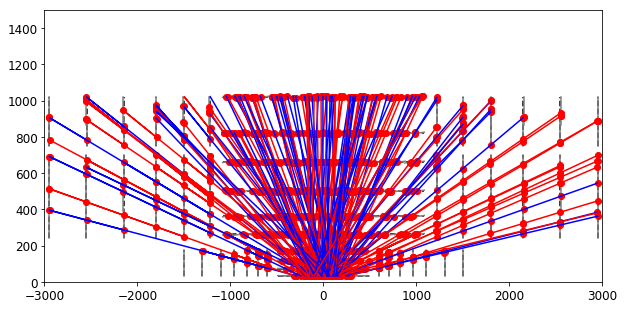

In [23]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
plt.plot(recHits[:,1],recHits[:,2],'ro')

for s in solutions:
    color = "b" if (s[8] < 0) else "r"
    plt.plot(s[0],s[1],color)

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 3000
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom/2))

detGeo.drawDetectorZR(ax,True)

plt.plot(recHits[:,3],np.sqrt(recHits[:,2]**2+recHits[:,1]**2),'ro')    
for s in solutions:
    color = "b" if (s[8] < 0) else "r"
    plt.plot(s[2],s[3],color)


# Test "Offline"  algorithm (ie: Hough transform) works

First try one track

### Implement the Hough transform

In [24]:
from TrackHelper import getPhiCircle

# given global posision and phi range, return consistent 1/rC
def getHT(hitR, hitPhi, phi):
    # Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi

    phi_circle = getPhiCircle(phi,1)

    f = 2/hitR*(np.cos(hitPhi-phi_circle))
    return f

In [25]:
# given global posision and z0 range, return consistent theta
def getHT_ZR(hitZ, hitR, z):
    
        
    #f = np.arctan2((hitZ - z),hitR)
    #f[f<0] = f[f<0]+2*np.pi
    f = np.arctan2(hitR,(hitZ - z))
    return f

## Try on one track first

 Draw the track

((8.0, 2.0, 73.0), 32.59253115434936, 3.539553474951603, -207.50754354870952)
((8.0, 4.0, 49.0), 71.42910894666939, 6.931367996579866, -349.80786347981575)
((13.0, 2.0, 21.0), 259.9955153577994, 10.75928537699565, -1037.7674698524263)
((7.0, 12.0, 56.0), 167.84747998199637, 11.499548112883165, -702.0)
((7.0, 12.0, 57.0), 166.75063210288948, 11.47833822242566, -698.0)
((7.0, 14.0, 56.0), 140.43643119118866, 10.75762727142407, -602.0)
((7.0, 14.0, 57.0), 139.34046574709188, 10.71878226547564, -598.0)
((12.0, 4.0, 85.0), 671.0210085402589, -54.52498299897115, -2545.5)
((12.0, 6.0, 85.0), 563.0007547936667, -27.25855737893691, -2145.5)
((12.0, 8.0, 84.0), 469.3303246092136, -9.576149525098325, -1801.5)
((12.0, 10.0, 83.0), 386.42360625609393, 1.6042669949838095, -1498.5)
((12.0, 10.0, 86.0), 385.601420604234, 1.694451007264036, -1495.5)
((12.0, 12.0, 86.0), 308.7917159650351, 8.34595784075977, -1215.5)
((16.0, 2.0, 48.0), 777.4594372316312, -88.94771644412124, -2944.5)


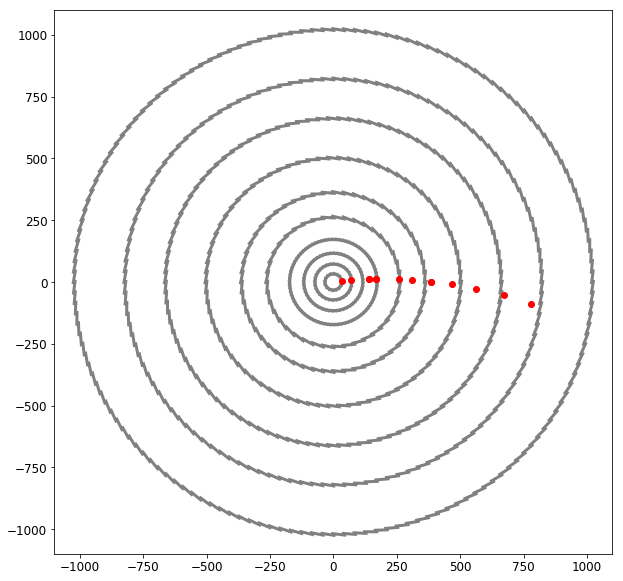

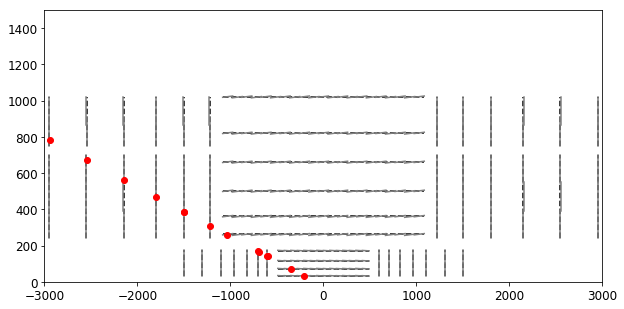

In [26]:
sTest = solutions[1]
testX = np.array(sTest[0])
testY = np.array(sTest[1])
testZ = np.array(sTest[2])
testR = np.array(sTest[3])


truthHits_raw = []
for tH in sTest[10]:
    print(tH)
    truthHits_raw.append( (tH[1],tH[2],tH[3]) )
tHits = np.array(truthHits_raw)

    
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)

plt.plot(tHits[:,0],tHits[:,1],'ro')
    
fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 3000
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom/2))

detGeo.drawDetectorZR(ax,True)
plt.plot(tHits[:,2],np.sqrt(tHits[:,0]**2+tHits[:,1]**2),'ro')


Truth Track, 1/Rc / phi / theta / z0 / q 0.0005869217638902878 0.11779721249126889 2.874220615373779 -87.82713655854397 1
-484.4995616402537 69.48447454283485
-956.1441224881578 256.52839552852674
-3236.3386194913837 1160.8036797865323
-2123.460581394 719.4605813940011
-2110.202858260946 714.2028582609469
-1792.0175030676494 588.0175030676503
-1778.7597799345951 582.759779934596
-8233.613730340276 3142.6137303402784
-6907.841417034872 2616.841417034876
-5767.677227592226 2164.677227592229
-4763.404700263383 1766.4047002633856
-4753.461407913594 1762.4614079135954
-3825.420788599811 1394.420788599813
-9556.071612862415 3667.071612862421


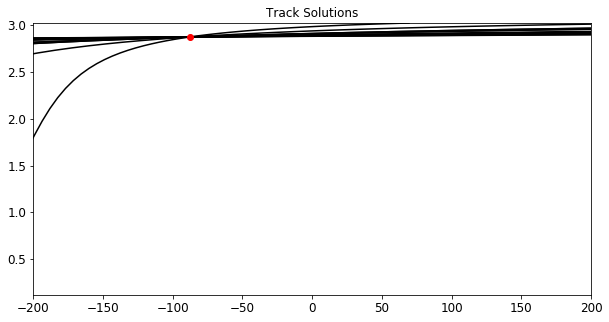

In [27]:
plt.figure(1, figsize=(10, 5))
plt.title(" Track Solutions")
plt.axis([0, 2*np.pi, -3*0.001,3*0.001])  

plt.figure(2, figsize=(10, 5))
plt.title("Track Solutions")
plt.axis([-200, 200, 15*np.pi/400,385*np.pi/400]) 

soln = solutions[1]

truePhi = soln[5]
trueQ   = soln[8]
trueRc  = soln[4]
trueTheta = soln[6]
trueZ0    = soln[7]
print("Truth Track, 1/Rc / phi / theta / z0 / q",1./trueRc,truePhi,trueTheta, trueZ0, trueQ)

m_max = np.tan(15*np.pi/400)
m_min = np.tan(385*np.pi/400)

for hitItr in range(len(soln[10])):

    hitX   = soln[10][hitItr][1]    
    hitY   = soln[10][hitItr][2]    
    hitZ   = soln[10][hitItr][3]        
    hitR   = np.sqrt(hitX**2+hitY**2)

    hitPhi = np.arctan2(hitY, hitX)   

    # Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi
    
    # Only consider plasiblel track (eg: from the orgin)
    phiXRange = np.linspace(hitPhi-np.pi/2, hitPhi+np.pi/2, 500)
    
    f = getHT(hitR, hitPhi,  phiXRange)

    plt.figure(1)
    plt.plot(phiXRange,f,"k")
    
    plt.figure(2)
    # Only consider plasiblel track (eg: from the orgin)

    #phiXRange = np.linspace(hitPhi-np.pi/2, hitPhi+np.pi/2, 500)
    z0Min = hitZ-(hitR/m_max)
    z0Max = hitZ-(hitR/m_min)    
    print(z0Min,z0Max)
    z0Range = np.linspace(z0Min, z0Max, 100)
    f = getHT_ZR(hitZ, hitR,  z0Range)
    plt.plot(z0Range,f,"k")

plt.figure(1)
plt.plot(truePhi,trueQ*1/trueRc,"ro")   

plt.figure(2)
plt.plot(trueZ0,trueTheta,"ro")    


plt.show()

# HT Algorithm

Basic idea here is to run the 2D HT algo twice.
First with theta/z0 with coarse binning to get the hits input in to the second HT
which will be Q/pt and phi

In [28]:
from HTTrackFinder import HTTrackFinding

def getHTForTrackFinding(hitR,hitPhi,phi):
    #Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi
    phi_circle = phi - np.pi/2
    return 2/hitR*(np.cos(hitPhi-phi_circle))

In [29]:
# given global posision and z0 range, return consistent theta
def getHT_ZRForTracking(hitZ, hitR, z):
    #f = np.arctan2((hitZ - z),hitR)
    #f[f<0] = f[f<0]+2*np.pi
    f = np.arctan2(hitR,(hitZ - z))
    return f

In [ ]:

HTFinderPtPhi = HTTrackFinding(0,2*np.pi,200,-1.33*0.001,1.33*0.001,400,getHTFunction=getHTForTrackFinding,
                               nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                               minHitsPerTrack=8,
                              ) 

fig, ax = plt.subplots(1, figsize=(20,10))

#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # hitInfo format (hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr)

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    #hitZ   = hitInfo[3]    

    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)
    
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    hitPhi = np.arctan2(hitY, hitX)
    if hitPhi<0: hitPhi += 2*np.pi
    
    HTFinderPtPhi.addHit(globalLayID, hitID, hitR, hitPhi)


#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    #eventParticles.append((trkI,pt,phi,q,6))

    ax.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

X, Y = np.meshgrid(HTFinderPtPhi.xBins, HTFinderPtPhi.yBins)
cmap = plt.get_cmap('binary')

HTFinderPtPhi.combineLayerMaps()

#
#  Tracks
#
plt.figure(1)

ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.33*0.001,1.33*0.001)
H = np.array(HTFinderPtPhi.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

recoTracks = HTFinderPtPhi.findTracks()
for rT in recoTracks:
    recPhi, recCurv, recQ  = rT[0]

    ax.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

In [ ]:
solns = HTFinderPtPhi.getSolutions()


In [40]:
from TrackHelper import getTruthDF
truth = getTruthDF(eventTruth)

In [ ]:
from trackml.score import score_event
score_event(truth,solns)

In [ ]:


HTFinderZTheta = HTTrackFinding(-150,150,200,15*np.pi/400,385*np.pi/400,400,getHTFunction=getHT_ZRForTracking,
                                nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                minHitsPerTrack=8)

fig, ax = plt.subplots(1, figsize=(20,10))

#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # hitInfo format (hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr)

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitZ   = hitInfo[3]    

    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)
    
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    
    HTFinderZTheta.addHit(globalLayID, hitID, hitZ, hitR,doRangeCut=False)


#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    trueZ0  = part[4]
    trueTheta  = part[3]

    ax.plot(trueZ0,trueTheta,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

X, Y = np.meshgrid(HTFinderZTheta.xBins, HTFinderZTheta.yBins)
cmap = plt.get_cmap('binary')

HTFinderZTheta.combineLayerMaps()

#
#  Tracks
#
plt.figure(1)

ax.set_xlim(-150,150)
ax.set_ylim(15*np.pi/400,385*np.pi/400)
H = np.array(HTFinderZTheta.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

recoTracks = HTFinderZTheta.findTracks()
for rT in recoTracks:
    recZ0, recTheta, recQ  = rT[0]

    ax.plot(recZ0,recTheta,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

In [ ]:
solnsZT = HTFinderZTheta.getSolutions()
score_event(truth,solnsZT)

In [ ]:
from HTTrackFinder import HTTrackFinding


HTFinderZThetaCoarse = HTTrackFinding(-150,150,20,15*np.pi/400,385*np.pi/400,20,getHTFunction=getHT_ZRForTracking,
                                      nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                      minHitsPerTrack=8)


#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # (hitID,hitX,hitY,hitZ,hitZ,hitLay,hitPhi)) 
    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitZ   = hitInfo[3]        

    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    HTFinderZThetaCoarse.addHit(globalLayID, hitID, hitZ, hitR,doRangeCut=False)


HTFinderZThetaCoarse.combineLayerMaps()

In [ ]:
matchedHits = HTFinderZThetaCoarse.getHitsInBin(0,0,recHits)
matchedHits[0:10]

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
plt.plot(matchedHits[:,1],matchedHits[:,2],'ro')

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 3000
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom/2))

detGeo.drawDetectorZR(ax,True)

plt.plot(matchedHits[:,3],np.sqrt(matchedHits[:,2]**2+matchedHits[:,1]**2),'ro')


In [ ]:
import time
start = time.time()
printTimes = True
HTFinderPtPhiFine = HTTrackFinding(0,2*np.pi,200,-1.33*0.001,1.33*0.001,400,
                                   getHTFunction=getHTForTrackFinding,
                                   nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                   minHitsPerTrack=8)

allRecoTracks = []
for iX in range(HTFinderZThetaCoarse.nXBins-1):
    for iY in range(HTFinderZThetaCoarse.nYBins-1):
        startGetHits = time.time()
        thisMatchedHits = HTFinderZThetaCoarse.getHitsInBin(iX,iY,recHits)
        
        thisZ0    = HTFinderZThetaCoarse.HitDB.getXCenter(iX)
        thisTheta = HTFinderZThetaCoarse.HitDB.getYCenter(iY) 
        
        if len(thisMatchedHits) < 5: continue
        
        HTFinderPtPhiFine.clear()
        
        #
        # Loop on rec hits
        # 
        for hitInfo in thisMatchedHits:

            hitID  = hitInfo[0]
            hitX   = hitInfo[1]    
            hitY   = hitInfo[2]    
            
            hitVolID = int(hitInfo[4])
            hitLayID = int(hitInfo[5])    
            globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

            # convert to r and phi
            hitR = np.sqrt(hitX**2 + hitY**2)
            hitPhi = np.arctan2(hitY, hitX)
            if hitPhi<0: hitPhi += 2*np.pi
            
            HTFinderPtPhiFine.addHit(globalLayID, hitID, hitR, hitPhi)  
        
        HTFinderPtPhiFine.combineLayerMaps()
        recoTracks = HTFinderPtPhiFine.findTracks()
        
        #
        #  Add the Z0 and theta measurements
        #
        for t in recoTracks:
            t[0].append(thisZ0)
            t[0].append(thisTheta)

        allRecoTracks += recoTracks
            
        for rt in recoTracks:
            HTFinderZThetaCoarse.removeHitsFromTrack(rt,removeOverlap=False)
        endRemoveHits = time.time()        
        if printTimes: print("\tremoveHits:",endRemoveHits - startRemoveHits)        
        
        print("One Iter:",endRemoveHits - startGetHits)     
            
        print(iX,iY,len(recoTracks),len(thisMatchedHits))

In [ ]:
plt.figure(1, figsize=(20, 10))
plt.figure(2, figsize=(20, 10))

#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]   
    trueZ0  = part[4]    
    trueTheta  = part[3]
    #eventParticles.append((trkI,pt,phi,q,6))

    plt.figure(1)
    plt.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

    plt.figure(2)
    plt.plot(trueZ0,trueTheta,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

#
#  Tracks
#
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.33*0.001,1.33*0.001)
for rT in allRecoTracks:
    recPhi, recCurv, recQ, recZ0, recTheta  = rT[0]

    plt.figure(1)
    plt.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

    plt.figure(2)
    plt.plot(recZ0,recTheta,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

In [ ]:
solnsAll = HTFinderPtPhiFine.getSolutionsFromTracks(allRecoTracks)
score_event(truth,solnsAll)

In [ ]:
solnsAll.head()

# ok lets try fitting

First do the road finding as above

In [30]:
HTFinderZThetaCoarseFitting = HTTrackFinding(-150,150,20,15*np.pi/400,385*np.pi/400,20,
                                             getHTFunction=getHT_ZRForTracking,
                                             nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                             minHitsPerTrack=8)


#
# Loop on rec hits
# 
for hitInfo in recHitsNew:
    
    # (hitID,hitX,hitY,hitZ,hitZ,hitLay,hitPhi)) 
    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitZ   = hitInfo[3]        

    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    HTFinderZThetaCoarseFitting.addHit(globalLayID, hitID, hitZ, hitR,doRangeCut=False)


HTFinderZThetaCoarseFitting.combineLayerMaps()

In [31]:

recHitsSlim = np.c_[recHitsNew[:,0],recHitsNew[:,7],recHitsNew[:,8],recHitsNew[:,9]]
print(recHitsNew[0:2])
print()
print(recHitsSlim[0:2])


[[1612.         -164.54491883   54.24971479 -171.41609094    8.
     8.          387.            3.          173.25721303    2.82311974]
 [1403.         -276.00357735 -231.01865139 -395.56649778   13.
     4.          343.            5.          359.92720375    3.83849876]]

[[1612.            3.          173.25721303    2.82311974]
 [1403.            5.          359.92720375    3.83849876]]


In [32]:
def doRoadFinding(HTFinderZThetaCoarseFitting,allRecoRoads,allFitTracks):
    import time
    start = time.time()
    printTimes = False
    HTFinderPtPhiFine = HTTrackFinding(0,2*np.pi,200,-1.33*0.001,1.33*0.001,400,
                                       getHTFunction=getHTForTrackFinding,
                                       nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                       minHitsPerTrack=6)
    
    for iX in range(HTFinderZThetaCoarseFitting.nXBins-1):
        for iY in range(HTFinderZThetaCoarseFitting.nYBins-1):
            startGetHits = time.time()
            thisMatchedHits = HTFinderZThetaCoarseFitting.getHitsInBin(iX,iY,recHitsSlim)
            endGetHits = time.time()
            if printTimes: print("\tgetHits:",endGetHits - startGetHits)        
                
            thisZ0    = HTFinderZThetaCoarseFitting.HitDB.getXCenter(iX)
            thisTheta = HTFinderZThetaCoarseFitting.HitDB.getYCenter(iY) 
            
            if len(thisMatchedHits) < 5: continue
                
            startConstructor = time.time()
            HTFinderPtPhiFine.clear()
            endConstructor = time.time()                                           
            if printTimes: print("\tclear:",endConstructor - startConstructor)        
            
            #
            # Loop on rec hits
            # 
            startHitLoop = time.time()
            for hitInfo in thisMatchedHits:

                hitID  = hitInfo[0]
                globalLayID = int(hitInfo[1])
                hitR   = hitInfo[2] 
                hitPhi   = hitInfo[3]            
                
                HTFinderPtPhiFine.addHit(globalLayID, hitID, hitR, hitPhi)  
            endHitLoop = time.time()        
            if printTimes: print("\thit Loop:",endHitLoop - startHitLoop)        
            
            startCombLay = time.time()        
            HTFinderPtPhiFine.combineLayerMaps()
            endCombLay = time.time()        
            if printTimes: print("\tcombineLayer:",endCombLay - startCombLay)        
            
            startFindTracks = time.time()        
            recoRoads = HTFinderPtPhiFine.findTracks(overlapLogicFirstHit=False)
            endFindTracks = time.time()        
            if printTimes: print("\tfindTracks:",endFindTracks - startFindTracks)        
            
            #
            #  Add the Z0 and theta measurements
            #
            for r in recoRoads:
                r[0].append(thisZ0)
                r[0].append(thisTheta)
            
            allRecoRoads += recoRoads
            startRemoveHits = time.time()        
            
            #
            #   Track Fitting
            #
            fitTracks3DIter = HTFinderPtPhiFine.fitTracks3DIter(recoRoads,recHitsNew,chi2Cut=1,
                                                                hitRIndex=8, hitPhiIndex=9, hitZIndex=3)
            
            allFitTracks += fitTracks3DIter
            #for rR in recoRoads:
            #    HTFinderZThetaCoarseFitting.removeHitsFromTrack(rR,removeOverlap=False)
            #print(recoRoads[0])
            #print()
            #print(fitTracks3DIter[0])
            #print()
            #print(fitTracks3DIter[0][1][0])
            #print(fitTracks3DIter[0][-2])
            #print()
            for fT in fitTracks3DIter:
                #print("removing:",fT[1][0])
                HTFinderZThetaCoarseFitting.removeHitsFromFitTrack(fT)
            endRemoveHits = time.time()        
            if printTimes: print("\tremoveHits:",endRemoveHits - startRemoveHits)        
            
            print("One Iter:",endRemoveHits - startGetHits)        
            print(iX,iY,len(recoRoads),len(fitTracks3DIter),len(thisMatchedHits)
              ,"-->",len(HTFinderZThetaCoarseFitting.getHitsInBin(iX,iY,recHitsSlim)))
            #break
        #break
        

    end = time.time()
    print("================")
    print("total time:",end - start)        

In [33]:
allRecoRoads = []
allFitTracks = []
doRoadFinding(HTFinderZThetaCoarseFitting,allRecoRoads,allFitTracks)
print(len(allRecoRoads),len(allFitTracks))
doRoadFinding(HTFinderZThetaCoarseFitting,allRecoRoads,allFitTracks)
print(len(allRecoRoads),len(allFitTracks))
doRoadFinding(HTFinderZThetaCoarseFitting,allRecoRoads,allFitTracks)
print(len(allRecoRoads),len(allFitTracks))

One Iter: 1.7691047191619873
0 0 9 8 261 --> 156
One Iter: 2.347607135772705
0 1 7 5 193 --> 157
One Iter: 2.4862771034240723
0 2 7 3 206 --> 173
One Iter: 2.340996026992798
0 3 6 4 185 --> 149
One Iter: 2.015369176864624
0 4 2 1 156 --> 141
One Iter: 1.9659910202026367
0 5 3 3 170 --> 142
One Iter: 1.9079837799072266
0 6 1 0 119 --> 119
One Iter: 1.6249747276306152
0 7 2 2 109 --> 86
One Iter: 1.7757761478424072
0 8 2 2 100 --> 75
One Iter: 1.7693047523498535
0 9 6 3 123 --> 91
One Iter: 1.2830321788787842
0 10 1 0 66 --> 66
One Iter: 1.239757776260376
0 11 2 1 80 --> 73
One Iter: 1.2800891399383545
0 12 3 1 90 --> 77
One Iter: 1.6269187927246094
0 13 2 2 86 --> 69
One Iter: 1.161370038986206
0 14 1 0 75 --> 75
One Iter: 1.0541954040527344
0 15 2 2 59 --> 39
One Iter: 1.6455748081207275
0 16 4 3 73 --> 39
One Iter: 1.359607219696045
0 17 4 2 68 --> 42
One Iter: 1.1805768013000488
0 18 5 5 55 --> 5
One Iter: 1.4032907485961914
1 0 1 1 143 --> 130
One Iter: 1.2869377136230469
1 1 2 1 14

/Users/johnda/Library/Python/3.6/lib/python/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


One Iter: 1.0631740093231201
5 9 1 1 71 --> 61
One Iter: 0.8759658336639404
5 10 0 0 61 --> 61
One Iter: 1.4200456142425537
5 11 0 0 75 --> 75
One Iter: 1.0509741306304932
5 12 1 1 72 --> 61
One Iter: 0.9929847717285156
5 13 1 0 68 --> 68
One Iter: 1.3464572429656982
5 14 1 1 73 --> 67
One Iter: 0.887092113494873
5 15 1 0 62 --> 62
One Iter: 0.6128828525543213
5 16 0 0 36 --> 36
One Iter: 0.6218140125274658
5 17 1 1 29 --> 22
One Iter: 0.658674955368042
6 0 0 0 83 --> 83
One Iter: 0.9982099533081055
6 1 0 0 103 --> 103
One Iter: 0.9634449481964111
6 2 0 0 105 --> 105
One Iter: 1.2152609825134277
6 3 0 0 103 --> 103
One Iter: 1.3260722160339355
6 4 2 2 126 --> 110
One Iter: 1.6148738861083984
6 5 1 1 119 --> 112
One Iter: 1.5657398700714111
6 6 4 0 124 --> 124
One Iter: 1.643500804901123
6 7 1 1 107 --> 98
One Iter: 1.0561110973358154
6 8 1 0 88 --> 88
One Iter: 1.020315170288086
6 9 2 2 74 --> 59
One Iter: 1.2084341049194336
6 10 0 0 63 --> 63
One Iter: 1.0479600429534912
6 11 1 1 68 -

One Iter: 0.5831551551818848
14 10 0 0 56 --> 56
One Iter: 0.7919111251831055
14 11 1 1 65 --> 55
One Iter: 0.9886209964752197
14 12 0 0 57 --> 57
One Iter: 0.5743122100830078
14 13 0 0 69 --> 69
One Iter: 0.5867290496826172
14 14 0 0 74 --> 74
One Iter: 0.9545137882232666
14 15 0 0 73 --> 73
One Iter: 0.5474560260772705
14 16 0 0 70 --> 70
One Iter: 0.4985949993133545
14 17 0 0 81 --> 81
One Iter: 0.391981840133667
14 18 0 0 63 --> 63
One Iter: 0.30860090255737305
15 0 0 0 29 --> 29
One Iter: 0.6943333148956299
15 1 0 0 17 --> 17
One Iter: 0.32108592987060547
15 2 0 0 25 --> 25
One Iter: 0.34836292266845703
15 3 0 0 35 --> 35
One Iter: 0.5650551319122314
15 4 1 1 45 --> 36
One Iter: 0.4736447334289551
15 5 0 0 32 --> 32
One Iter: 0.3012049198150635
15 6 0 0 31 --> 31
One Iter: 0.573436975479126
15 7 1 1 51 --> 41
One Iter: 1.042956829071045
15 8 0 0 56 --> 56
One Iter: 0.718656063079834
15 9 1 1 43 --> 36
One Iter: 0.5404930114746094
15 10 0 0 38 --> 38
One Iter: 0.6799678802490234
15

One Iter: 0.662877082824707
4 12 0 0 27 --> 27
One Iter: 0.3889498710632324
4 13 0 0 38 --> 38
One Iter: 0.3934791088104248
4 14 0 0 43 --> 43
One Iter: 0.3055300712585449
4 15 0 0 23 --> 23
One Iter: 0.3170187473297119
4 16 0 0 24 --> 24
One Iter: 0.29419589042663574
4 17 0 0 16 --> 16
One Iter: 0.5338020324707031
5 0 0 0 90 --> 90
One Iter: 0.9903240203857422
5 1 0 0 96 --> 96
One Iter: 0.6286180019378662
5 2 0 0 81 --> 81
One Iter: 0.4951450824737549
5 3 0 0 75 --> 75
One Iter: 0.7886371612548828
5 4 0 0 65 --> 65
One Iter: 0.4311408996582031
5 5 0 0 44 --> 44
One Iter: 0.40854883193969727
5 6 0 0 52 --> 52
One Iter: 0.3856360912322998
5 7 0 0 51 --> 51
One Iter: 0.35459208488464355
5 8 0 0 40 --> 40
One Iter: 0.35021519660949707
5 9 0 0 25 --> 25
One Iter: 0.7283627986907959
5 10 0 0 27 --> 27
One Iter: 0.3202698230743408
5 11 0 0 22 --> 22
One Iter: 0.3045477867126465
5 12 0 0 24 --> 24
One Iter: 0.30824899673461914
5 13 0 0 24 --> 24
One Iter: 0.38422513008117676
5 14 0 0 40 --> 

One Iter: 0.4627258777618408
13 13 0 0 68 --> 68
One Iter: 0.4376981258392334
13 14 0 0 57 --> 57
One Iter: 0.7846319675445557
13 15 0 0 58 --> 58
One Iter: 0.4803478717803955
13 16 0 0 65 --> 65
One Iter: 0.5644166469573975
13 17 0 0 71 --> 71
One Iter: 0.4396548271179199
13 18 0 0 55 --> 55
One Iter: 0.8799598217010498
14 0 0 0 29 --> 29
One Iter: 0.6389729976654053
14 1 0 0 24 --> 24
One Iter: 0.464663028717041
14 2 0 0 36 --> 36
One Iter: 0.4521758556365967
14 3 0 0 35 --> 35
One Iter: 0.4110391139984131
14 4 0 0 29 --> 29
One Iter: 0.340954065322876
14 5 0 0 32 --> 32
One Iter: 0.3130497932434082
14 6 0 0 26 --> 26
One Iter: 0.4523472785949707
14 7 0 0 39 --> 39
One Iter: 0.4097330570220947
14 8 0 0 33 --> 33
One Iter: 0.7481899261474609
14 9 0 0 38 --> 38
One Iter: 0.48732781410217285
14 10 0 0 48 --> 48
One Iter: 0.4883291721343994
14 11 0 0 47 --> 47
One Iter: 0.501284122467041
14 12 0 0 54 --> 54
One Iter: 0.5749619007110596
14 13 0 0 69 --> 69
One Iter: 0.9236838817596436
14 

One Iter: 0.348513126373291
3 14 0 0 26 --> 26
One Iter: 0.2720818519592285
3 15 0 0 19 --> 19
One Iter: 0.327625036239624
3 16 0 0 21 --> 21
One Iter: 0.3373839855194092
3 17 0 0 12 --> 12
One Iter: 0.6182999610900879
4 0 0 0 100 --> 100
One Iter: 1.045440912246704
4 1 0 0 94 --> 94
One Iter: 0.7095470428466797
4 2 0 0 84 --> 84
One Iter: 0.5522730350494385
4 3 0 0 86 --> 86
One Iter: 0.798698902130127
4 4 0 0 56 --> 56
One Iter: 0.4640059471130371
4 5 0 0 57 --> 57
One Iter: 0.40375494956970215
4 6 0 0 56 --> 56
One Iter: 0.3448209762573242
4 7 0 0 39 --> 39
One Iter: 0.3358001708984375
4 8 0 0 31 --> 31
One Iter: 0.3547992706298828
4 9 0 0 24 --> 24
One Iter: 0.34418201446533203
4 10 0 0 22 --> 22
One Iter: 0.3008849620819092
4 11 0 0 21 --> 21
One Iter: 0.658073902130127
4 12 0 0 27 --> 27
One Iter: 0.3807070255279541
4 13 0 0 38 --> 38
One Iter: 0.40683698654174805
4 14 0 0 43 --> 43
One Iter: 0.2877349853515625
4 15 0 0 23 --> 23
One Iter: 0.32448387145996094
4 16 0 0 24 --> 24
O

One Iter: 0.7647318840026855
12 17 0 0 63 --> 63
One Iter: 0.3761286735534668
12 18 0 0 48 --> 48
One Iter: 0.3465731143951416
13 0 0 0 36 --> 36
One Iter: 0.4463479518890381
13 1 0 0 40 --> 40
One Iter: 0.41613292694091797
13 2 0 0 36 --> 36
One Iter: 0.3525660037994385
13 3 0 0 35 --> 35
One Iter: 0.6991469860076904
13 4 0 0 39 --> 39
One Iter: 0.3387570381164551
13 5 0 0 32 --> 32
One Iter: 0.29965806007385254
13 6 0 0 32 --> 32
One Iter: 0.4087967872619629
13 7 0 0 50 --> 50
One Iter: 0.40279412269592285
13 8 0 0 42 --> 42
One Iter: 0.4310300350189209
13 9 0 0 57 --> 57
One Iter: 0.7651686668395996
13 10 0 0 53 --> 53
One Iter: 0.42421817779541016
13 11 0 0 45 --> 45
One Iter: 0.49006080627441406
13 12 0 0 63 --> 63
One Iter: 0.459536075592041
13 13 0 0 68 --> 68
One Iter: 0.4405510425567627
13 14 0 0 57 --> 57
One Iter: 0.7716889381408691
13 15 0 0 58 --> 58
One Iter: 0.49599695205688477
13 16 0 0 65 --> 65
One Iter: 0.4919910430908203
13 17 0 0 71 --> 71
One Iter: 0.3787488937377

In [34]:
def removeOverlappingHits(trackList):
    solnsPreclean = HTFinderZThetaCoarseFitting.getSolutionsFromTracks(trackList)
    nTracksPerHitPreClean = solnsPreclean["hit_id"].value_counts()
    multiTperH = nTracksPerHitPreClean[nTracksPerHitPreClean > 1]
    HTFinderZThetaCoarseFitting.removeOverlap(trackList,multiTperH.index)

In [35]:
solnsFittedIterAll = HTFinderZThetaCoarseFitting.getSolutionsFromTracks(allFitTracks)
nTracksPerHitIterAll = solnsFittedIterAll["hit_id"].value_counts()

In [36]:
def printCounts(trackPerHit,nTrials=10):
    for i in range(nTrials):
        print(len(trackPerHit[trackPerHit > i]))
    #print(len(trackPerHit[trackPerHit > 1]))
    #print(len(trackPerHit[trackPerHit > 2]))
    #print(len(trackPerHit[trackPerHit > 3]))
    #print(len(trackPerHit[trackPerHit > 4]))


#printCounts(solnsFitted["hit_id"].value_counts())
#multiTperH = nTracksPerHit[nTracksPerHit > 1]
#print()
#printCounts(solnsFittedIter["hit_id"].value_counts())
#multiTperHIter = nTracksPerHitIter[nTracksPerHitIter > 1]
#print()
printCounts(solnsFittedIterAll["hit_id"].value_counts())
#multiTperHIter = nTracksPerHitIter[nTracksPerHitIter > 1]

1378
32
32
0
0
0
0
0
0
0


In [37]:
removeOverlappingHits(allFitTracks)

In [38]:
solnsFittedIter2 = HTFinderZThetaCoarseFitting.getSolutionsFromTracks(allFitTracks)
nTracksPerHitIter2 = solnsFittedIter2["hit_id"].value_counts()
printCounts(nTracksPerHitIter2)

1378
0
0
0
0
0
0
0
0
0


In [48]:
def removeOverlapDebug(fittedTracks, hitIdsToClean):
    for hitID in hitIdsToClean:
        print(hitID)
        # get lowest chi2 for this hitID   
        maxNHits = 0
        trackIDs = [] #
        for tIndex, trackInfo in enumerate(fittedTracks):
            thisTrackHitIDs = trackInfo[1][0]
            for hIndex, thisHitID in enumerate(thisTrackHitIDs):
                if hitID == thisHitID:
                    thisX2    = trackInfo[-1][hIndex]
                    thisNHits = len(trackInfo[-1])
                    if thisNHits > maxNHits:                        
                        maxNHits = thisNHits
                    trackIDs.append((tIndex,thisNHits,hIndex))
        print(trackIDs)
        # remove hit from other tracsk
        for tIndex in trackIDs:
            if tIndex[1] < maxNHits:
                fittedTracks[int(tIndex[0])][1][0].pop(tIndex[2])


In [41]:
from trackml.score import score_event
#print(score_event(truth,solnsCleaned))
print(score_event(truth,solnsFittedIter2))

0.6764252696456086


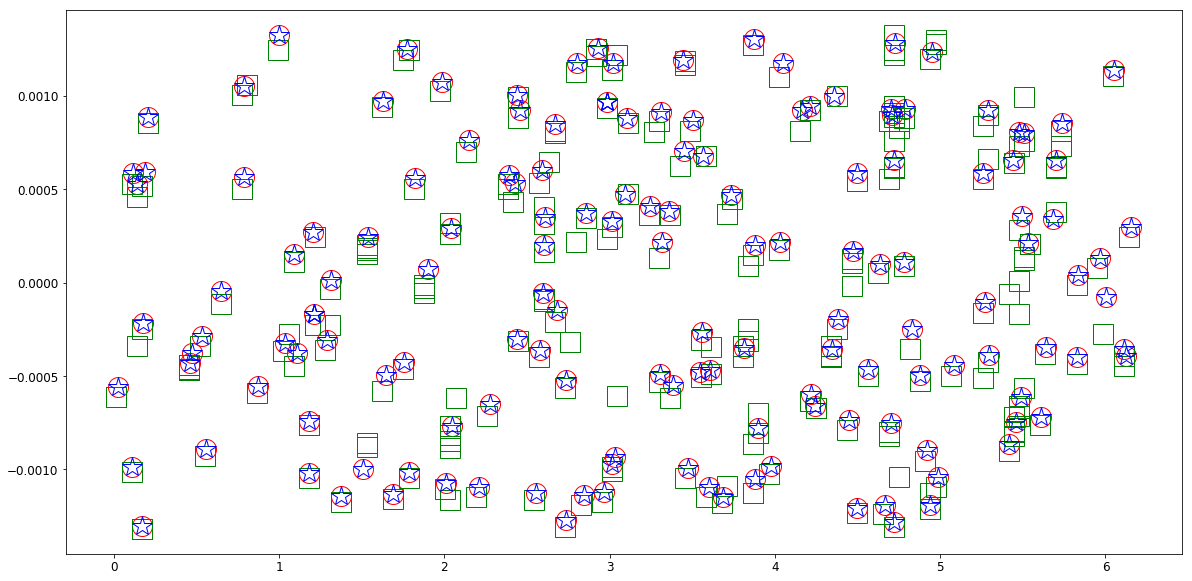

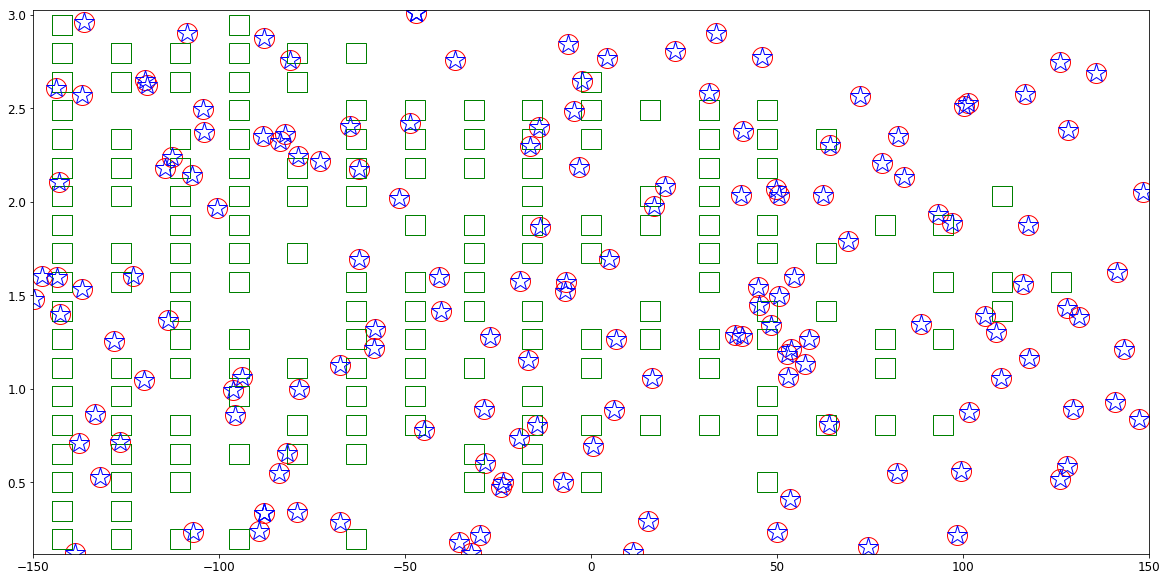

In [42]:
plt.figure(1, figsize=(20, 10))
plt.figure(2, figsize=(20, 10))

#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]   
    trueZ0  = part[4]    
    trueTheta  = part[3]
    #eventParticles.append((trkI,pt,phi,q,6))

    plt.figure(1)
    plt.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

    plt.figure(2)
    plt.plot(trueZ0,trueTheta,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

#
#  Roads
#
for rT in allRecoRoads:
    recPhi, recCurv, recQ, recZ0, recTheta  = rT[0]

    plt.figure(1)
    plt.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='g',markerfacecolor='None')

    plt.figure(2)
    plt.plot(recZ0,recTheta,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='g',markerfacecolor='None')


#
#  Tracks
#
#for fTIndex, fT in enumerate(fittedTracks3D):
#    fitPhi, fitCurv, fitQ, fitZ0, fitTheta  = fT[0]
#
#    plt.figure(1)
#    plt.plot(fitPhi,fitCurv,
#            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')
#
#    plt.figure(2)
#    plt.plot(fitZ0,fitTheta,
#            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')
#    #plt.text(fitZ0,fitTheta,str(fTIndex))
    
    
#
#  Tracks
#
for fTIndex, fT in enumerate(allFitTracks):
    fitPhi, fitCurv, fitQ, fitZ0, fitTheta  = fT[0]

    plt.figure(1)
    plt.plot(fitPhi,fitCurv,
            "*",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

    plt.figure(2)
    plt.plot(fitZ0,fitTheta,
            "*",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')
    #plt.text(fitZ0,fitTheta,str(fTIndex))    
    
plt.figure(2)
plt.axis([-150, 150, 15*np.pi/400,385*np.pi/400]) 

plt.show()

# Damn near perfect !

In [43]:
unusedHitIDs = []
unusedHits = []
for iX in range(HTFinderZThetaCoarseFitting.nXBins-1):
        for iY in range(HTFinderZThetaCoarseFitting.nYBins-1):
            
            matchedHitID = HTFinderZThetaCoarseFitting.getHitsInBin(iX,iY,recHits)
            if not len(matchedHitID): continue
            for hitID in matchedHitID[:,0]:
                if hitID not in unusedHitIDs:
                    unusedHitIDs.append(hitID)
                    unusedHits.append(recHitsNew[recHitsNew[:,0] == hitID][0])
#print(HTFinderZThetaCoarseFitting.getHitsInBin(0,0,recHits)[:,0])
#print(HTFinderZThetaCoarseFitting.getHitsInBin(0,1,recHits)[:,0])
#matchedHits[:,0]
unusedHits = np.array(unusedHits)
print(len(unusedHitIDs))
print(len(unusedHits))

569
569


In [44]:
from HTTrackFinder import chi2FunPhiR, chi2FunZR
def chi2HitTrack(track,hit,hitRIndex,hitPhiIndex, hitZIndex):
    p_RPhi = track[0][0:3]
    p_ZR   = [track[0][3], np.tan(track[0][4])]
    chi2PerHit_RPhi = chi2FunPhiR(p_RPhi, hit[hitRIndex], hit[hitPhiIndex])
    chi2PerHit_ZR   = chi2FunZR  (p_ZR,   hit[hitZIndex], hit[hitRIndex])
    chi2PerHit      = np.sqrt(chi2PerHit_RPhi*chi2PerHit_RPhi + chi2PerHit_ZR*chi2PerHit_ZR)
    return chi2PerHit

In [45]:
chi2Cut = 1
for unHit in unusedHits:
    #print("New Hit")
    for fT in allFitTracks:
        thisX2 = chi2HitTrack(fT,unHit,hitRIndex=8, hitPhiIndex=9, hitZIndex=3)
        if thisX2 < chi2Cut: 
            #print("match",thisX2)
            #print("old",fT)
            #print("adding",unHit[0],unHit[7],thisX2)
            fT[1][0] = np.append(fT[1][0],unHit[0])
            fT[3] = np.append(fT[3],unHit[7])
            fT[4] = np.append(fT[4],thisX2)
            #print("new",fT)
            unusedHitIDs.remove(unHit[0])
            break
len(unusedHitIDs)

0

In [46]:
solnsFittedIter3 = HTFinderZThetaCoarseFitting.getSolutionsFromTracks(allFitTracks)
nTracksPerHitIter3 = solnsFittedIter3["hit_id"].value_counts()
printCounts(nTracksPerHitIter3)


1947
0
0
0
0
0
0
0
0
0


In [47]:
from trackml.score import score_event
#print(score_event(truth,solnsCleaned))
print(score_event(truth,solnsFittedIter3))

1.0


In [ ]:
from HTTrackFinder import DORead, correctTrackPhis, fitTrackXY, fitTrackRZ
from HTTrackFinder import drawTrackFit, drawTrackToFit, drawTrackToFitZR, drawTrackFitZR

In [ ]:
testRoad = allRecoRoads[0]

#testRoad = fittedTracks3D[0]
doFit = True

hitRIndex=7
hitPhiIndex=8
hitZIndex=3
fullRoadInfo = DORead(testRoad,recHitsNew)
correctTrackPhis(fullRoadInfo)                                                       

if doFit: 
    newTrack2D  = fitTrackXY(fullRoadInfo,chi2Cut=1e8,     hitRIndex=hitRIndex, hitPhiIndex=hitPhiIndex)
    newTrack    = fitTrackRZ(newTrack2D,   chi2Cut=5e8, hitZIndex=hitZIndex, hitRIndex=hitRIndex)
    nHitsNewTrack = len(newTrack[1])

    if nHitsNewTrack < 4:
        print("ERROR fail hit cut")
    newTrack.append(list(newTrack[1][:,-1]))
    # newTrack[1] = [list(newTrack[1][:,0])]
    print("X2:",newTrack[3],newTrack[2])

In [ ]:
#newTrackRefit = fitTrackXY(newTrack,chi2Cut=1e6,     hitRIndex=hitRIndex, hitPhiIndex=hitPhiIndex)
#print("X2:",newTrackRefit[3],newTrackRefit[2])

In [ ]:
testRoad[0]

In [ ]:
drawTrackToFit(fullRoadInfo,hitRIndex=hitRIndex, hitPhiIndex=hitPhiIndex,color="b")
drawTrackToFit(fittedTrack,hitRIndex=hitRIndex, hitPhiIndex=hitPhiIndex)
drawTrackFit(fittedTrack, "r", hitRIndex=hitRIndex)

In [49]:
drawTrackToFitZR(fullRoadInfo,hitRIndex=hitRIndex,color="b")
drawTrackToFitZR(fittedTrack,hitRIndex=hitRIndex)
drawTrackFitZR(fittedTrack, "r", hitZIndex=hitZIndex)

NameError: name 'drawTrackToFitZR' is not defined

# Testing the iterative fit